In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

In [12]:
# load data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')
X_train = np.concatenate((X_1, X_2))
y_train = np.zeros((X_train.shape[0]))
y_train[0:X_1.shape[0]] = 0
y_train[X_1.shape[0]:] = 1


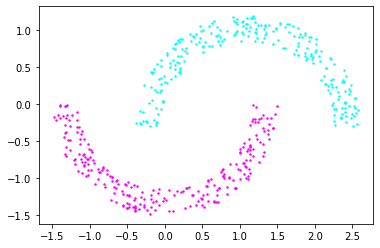

In [13]:
# simply visualising data
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)


In [19]:
# svm classifier
clf = svm.SVC(kernel = 'rbf', gamma = 'scale', decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((2, 2))
X = [X_1_test, X_2_test]
for i in range(2):
    for x in X[i]:
        x = x.reshape(1, -1)
        ConfusionMatrix[int(clf.predict(x)), i] = ConfusionMatrix[int(clf.predict(x)), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2'],['True 1', 'True 2'])

,True 1,True 2
Predicted 1,96.0,6.0
Predicted 2,4.0,94.0


In [17]:
# performance measures
N = np.sum(ConfusionMatrix[:, 0])
TP = ConfusionMatrix[0, 0]
TN = ConfusionMatrix[1, 1]
FP = ConfusionMatrix[0, 1]
FN = ConfusionMatrix[1, 0]
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy,
})
print({
    'Precision: ': Precision,
})
print({
    'Recall: ': Recall,
})
print({
    'F_measure: ': F_measure,
})

{'Accuracy: ': 96.0}
{'Precision: ': 0.9411764705882353}
{'Recall: ': 0.96}
{'F_measure: ': 0.9504950495049505}


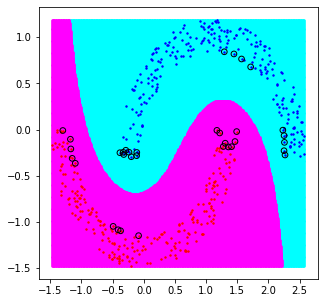

In [21]:
# Decision region plot for all the classes together with the training data superposed
x_min = min([min(X_1[:, 0]), min(X_2[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1])])
plt.rcParams['figure.figsize'] = [5, 5]
x_1 = []
x_2 = []
for x in np.arange(x_min, x_max, 0.01):
    for y in np.arange(y_min, y_max, 0.01):
        c = clf.predict([[x, y]])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='none', edgecolors='black', s = 32)